<h1><center><font color='red'><h1>Visualizations in Python on Sales Data<h1></font></center></h1>

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Import data

In [2]:
sales = pd.read_csv('SalesData.csv')
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


In [4]:
sales.describe()

,AccountId,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
count,3.709000e+03,3709.000000,3709.000000,3709.000000,3709.00000,3709.000000,3709.000000
mean,7.716535e+04,6134.912371,7998.039527,2.293567,3.00791,1.067396,1.242354
std,2.417615e+05,9195.070153,11130.551032,3.659052,4.31373,0.211269,0.192727
min,1.116000e+03,-11053.440000,-59090.810000,-3.000000,-17.00000,0.700000,0.910000
25%,3.774000e+03,0.000000,1886.690000,0.000000,1.00000,0.880000,1.080000
50%,6.500000e+03,3128.340000,3918.770000,1.000000,1.83330,1.070000,1.240000
75%,1.041900e+04,7837.540000,10122.400000,3.000000,4.00000,1.250000,1.410000
max,1.219499e+06,145760.120000,168033.360000,53.000000,61.00000,1.420000,1.570000


#### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [5]:
Sales_by_region = sales.groupby('Region')[['Sales2015','Sales2016']].sum()
Sales_by_region

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


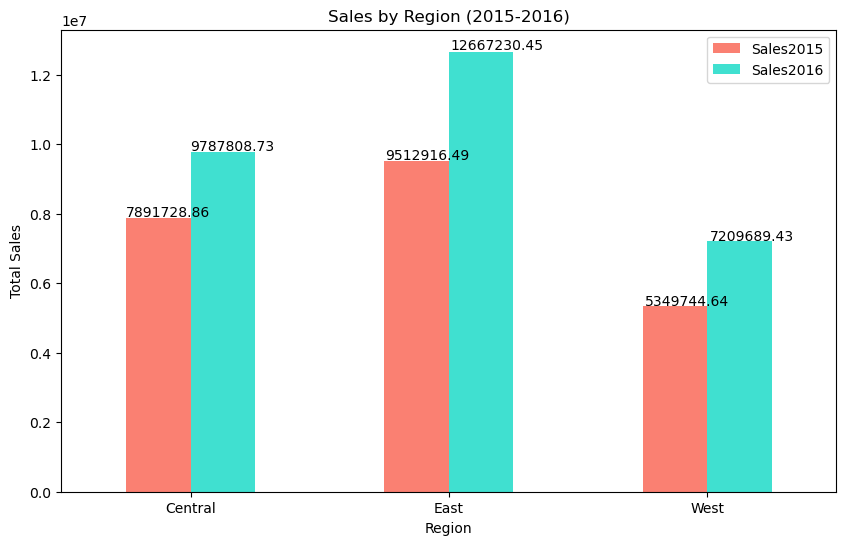

In [6]:
a = Sales_by_region.plot(kind='bar', figsize=(10, 6), color=['salmon', 'turquoise'])
for p in a.patches:
    a.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Sales by Region (2015-2016)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation = 0)
plt.show()

#### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [7]:
sales_of_2016 = sales.groupby('Region')[['Sales2016']].sum()
sales_of_2016

,Sales2016
Region,
Central,9.787809e+06
East,1.266723e+07
West,7.209689e+06


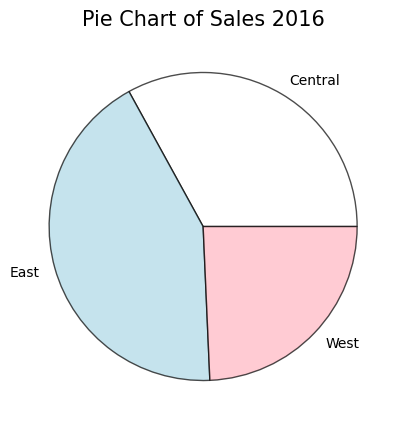

In [8]:
sales_of_2016.plot(kind='pie',subplots = True, figsize = (5,5),legend = False, fontsize = 10,
                   wedgeprops={'alpha':0.7, 'edgecolor':'black'},
                   colors = ['white','lightblue','lightpink'])
plt.title('Pie Chart of Sales 2016', fontsize = 15, fontweight= 10)
plt.ylabel('')
plt.show()

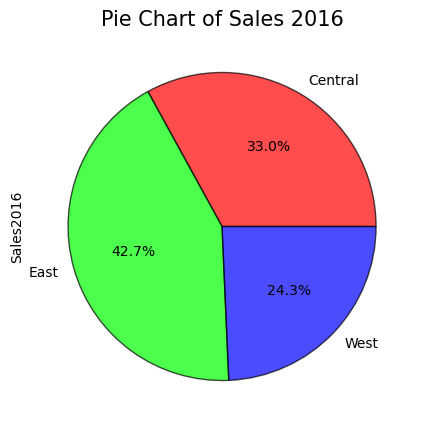

In [9]:
sales_of_2016.plot(kind='pie',subplots = True, autopct='%1.1f%%' ,figsize = (5,5),
                   legend = False, wedgeprops={'alpha':0.7, 'edgecolor':'black'},
                  colors = ['red','lime','blue'])
plt.title('Pie Chart of Sales 2016', fontsize = 15, fontweight= 10)
plt.show()

#### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [10]:
sales_region_tier = sales.pivot_table(index='Region',columns='Tier',values=['Sales2015', 'Sales2016'], aggfunc= 'sum')
sales_region_tier

Sales2015                                      Sales2016  \
Tier           High        Low           Med       Out        High   
Region                                                               
Central  4798698.43  943439.67  2.068226e+06  81364.89  6026042.94   
East     6102946.12  901665.80  2.470998e+06  37306.55  7817151.10   
West     2944789.26  671064.38  1.718476e+06  15415.08  3768038.35   

                                            
Tier            Low           Med      Out  
Region                                      
Central  1132832.85  2.632181e+06 -3248.53  
East     1144929.59  3.705150e+06     0.00  
West     1099502.18  2.342149e+06     0.00

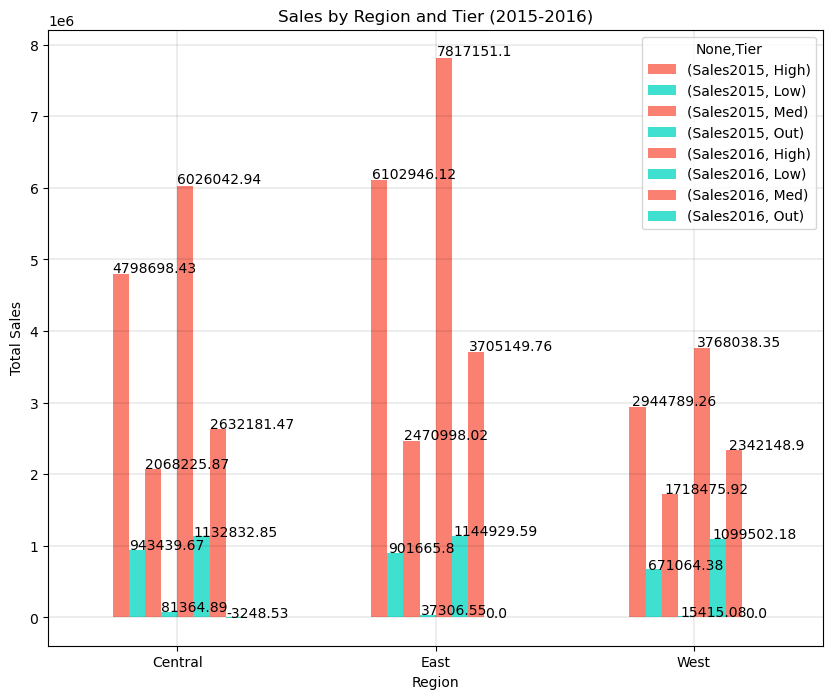

In [11]:
b = sales_region_tier.plot(kind='bar', figsize=(10, 8),color=['salmon', 'turquoise'])
for p in b.patches:
    b.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Sales by Region and Tier (2015-2016)')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
b.grid(True, linestyle='-', linewidth=0.1, color='black')
b.xaxis.grid(True)
b.yaxis.grid(True)
plt.show()

#### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [12]:
decline_state = sales[sales['Region'] == 'East'].groupby('State')[['Sales2015','Sales2016']].sum()
decline_state

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


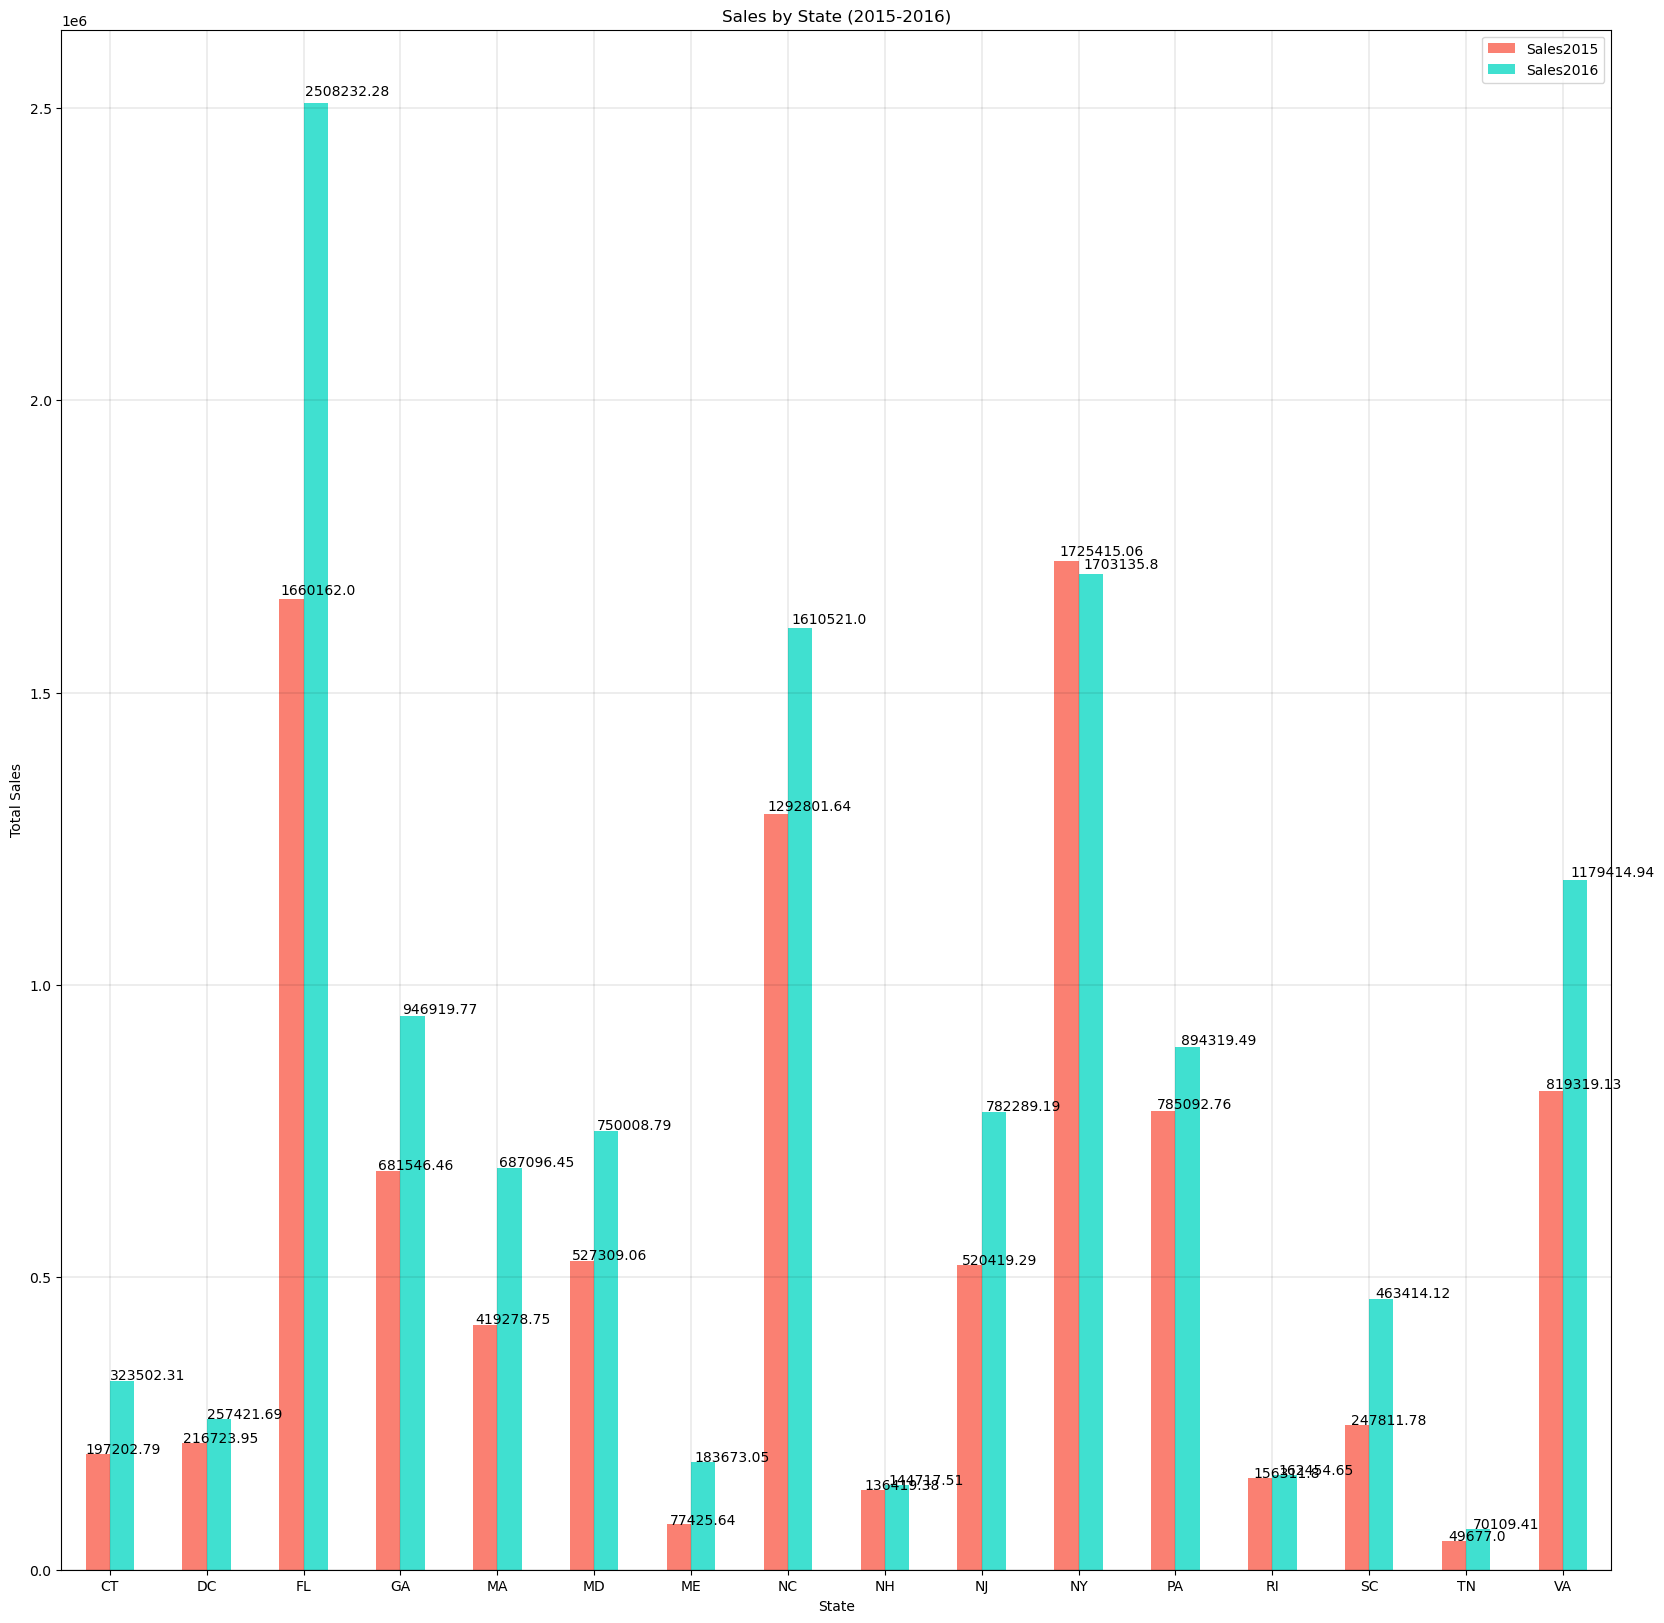

In [13]:
c = decline_state.plot(kind='bar', figsize=(20, 20),color=['salmon', 'turquoise'])
for p in c.patches:
    c.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Sales by State (2015-2016)')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
c.grid(True, linestyle='-', linewidth=0.1, color='black')
c.xaxis.grid(True)
c.yaxis.grid(True)
plt.show()

##### NY is registered a decline in 2016 as compared to 2015

#### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [14]:
high_tier_units = sales[sales['Tier'] == 'High'].groupby('Division')[['Units2015','Units2016']].sum()
high_tier_units

,Units2015,Units2016
Division,,
BIG APPLE,180.8330,231.0000
CHARGERS,123.6666,164.4999
CONGRESSIONAL,164.5003,205.0000
DIAMONDBACK,153.3334,176.6667
EMPIRE,414.3332,449.3332
GRIDIRON,213.6673,246.1675
GULF STREAM,185.0000,301.0009
HAILSTORM,187.8338,247.0003
KINETIC,214.3334,244.5001


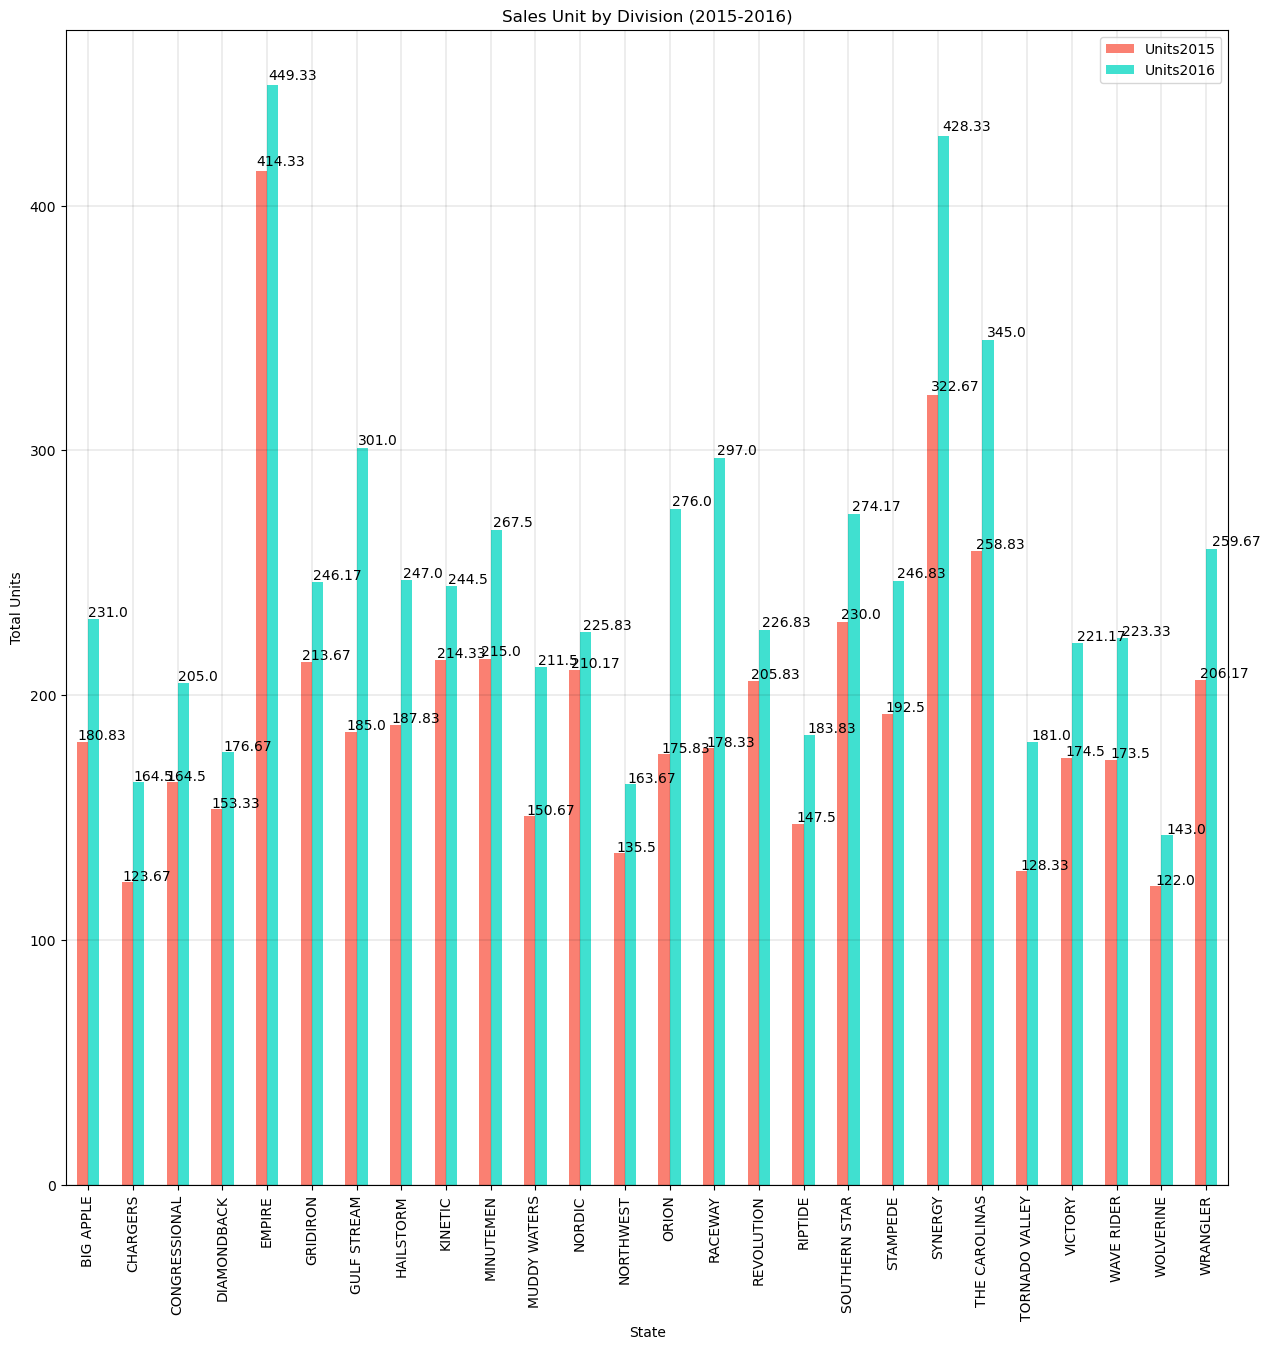

In [15]:
d = high_tier_units.plot(kind='bar', figsize=(15, 15),color=['salmon', 'turquoise'])
for p in d.patches:
    d.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Sales Unit by Division (2015-2016)')
plt.xlabel('State')
plt.ylabel('Total Units')
plt.xticks(rotation=90)
d.grid(True, linestyle='-', linewidth=0.1, color='black')
d.xaxis.grid(True)
d.yaxis.grid(True)
plt.show()

#### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -

In [16]:
sales["Qtr"]="Q"+pd.to_datetime(sales["Month"],format="%b").dt.quarter.astype(str)

In [17]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


#### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [18]:
qtr_sales = sales.groupby('Qtr')[['Sales2015','Sales2016']].sum()
qtr_sales

,Sales2015,Sales2016
Qtr,,
Q1,5.485800e+06,6.997953e+06
Q2,5.390862e+06,7.237361e+06
Q3,6.164094e+06,7.861546e+06
Q4,5.713634e+06,7.567868e+06


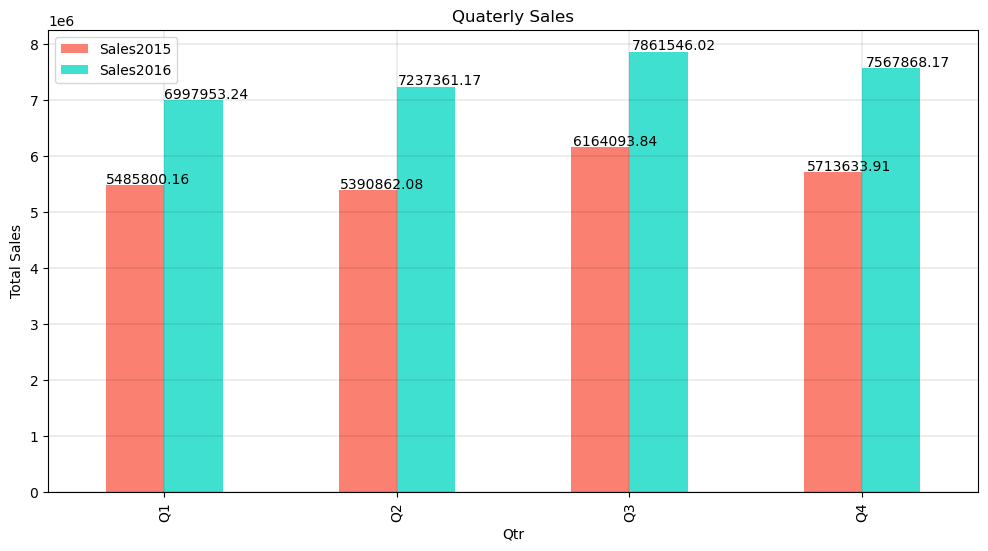

In [19]:
e = qtr_sales.plot(kind='bar', figsize=(12,6),color=['salmon', 'turquoise'])
for p in e.patches:
    e.annotate(str(round(p.get_height(), 2)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.title('Quaterly Sales')
plt.xlabel('Qtr')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
e.grid(True, linestyle='-', linewidth=0.1, color='black')
e.xaxis.grid(True)
e.yaxis.grid(True)
plt.show()

#### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [20]:
sales1 = sales[sales['Sales2016'] >= 0]
sales1

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


In [21]:
qtr_tier_sales=pd.pivot_table(data=sales1,index="Tier",columns="Qtr",values="Sales2016",aggfunc='sum')
qtr_tier_sales

Qtr,Q1,Q2,Q3,Q4
Tier,,,,
High,3939152.865,4.134530e+06,4.875456e+06,4.744949e+06
Low,951041.770,8.959321e+05,7.973867e+05,7.446085e+05
Med,2183563.249,2.218725e+06,2.197058e+06,2.108107e+06
Out,0.000,0.000000e+00,0.000000e+00,0.000000e+00


array([[<Axes: ylabel='Q1'>, <Axes: ylabel='Q2'>],
       [<Axes: ylabel='Q3'>, <Axes: ylabel='Q4'>]], dtype=object)

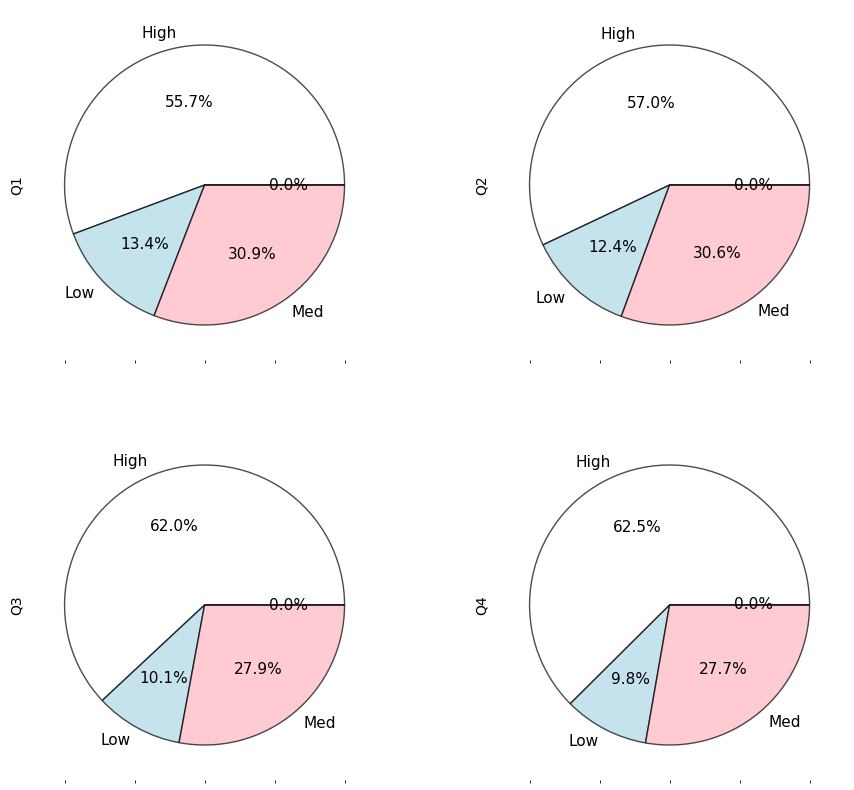

In [22]:
qtr_tier_sales.plot.pie(labels=qtr_tier_sales.index,figsize=(11,10),autopct="%.1f%%",
                      fontsize=11,
                      layout=(2,2),subplots=True,
                       legend = False, wedgeprops={'alpha':0.7, 'edgecolor':'black'}
                        ,colors = ['white','lightblue','lightpink','lightcyan']
)